#Dealing with the subset of Telematics data from Brookings Report
This data corresponds to data from 2013 in the state of Ohio

In [1]:
import pandas as pd
import os
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
os.chdir('../../projects/telematics/2013brookingsData/')
!dir

 Volume in drive C is OS
 Volume Serial Number is 222B-1C6E

 Directory of C:\Users\kesj\Documents\projects\telematics\2013brookingsData

06/23/2015  10:54 AM    <DIR>          .
06/23/2015  10:54 AM    <DIR>          ..
11/20/2013  04:42 PM        89,600,521 Brookings Final Data.xlsx
10/29/2014  04:16 PM         3,744,888 driverMileagle.csv
10/31/2014  12:03 PM         2,733,177 driverSummaryDF1.csv
               3 File(s)     96,078,586 bytes
               2 Dir(s)  69,544,202,240 bytes free


In [3]:
infile = 'Brookings Final Data.xlsx'
fulldata = pd.read_excel(infile)
print len(fulldata)

401448


In [4]:
fulldata.columns


Index([                        u'HH_ID',                     u'DRIVER_ID',
                            u'MOD_DATE',                u'Market_Unit_ID',
                       u'POLICY_NUMBER',                         u'STATE',
                        u'UNIQUE_DIGIT',                    u'CAR_NUMBER',
                             u'FRED_ID',                           u'VIN',
           u'Odometer at time captured',        u'Odometer captured data',
               u'Lower Net Worth Range',         u'Upper Net Worth Range',
              u'Home ownership (1=yes)',                u'Household Size',
                 u'Young adult present',          u'Senior Adult Present',
                       u'Child Present', u'Lower Income Range (source 1)',
       u'Upper Income Range (source 1)', u'Lower Income Range (source 2)',
       u'Upper Income Range (source 2)',                u'Martial Status',
                 u'Length at Residence',            u'Home Property Type',
       u'Home Property Ty

In [5]:
# since all are Ohio, drop that column
fulldata.drop('STATE',inplace=True,axis=1)

In [6]:
fulldata['Claim Flag (1=Claim)'].value_counts()

0    385113
1     16335
dtype: int64

In [10]:
fulldata.rename(columns={'Claim Flag (1=Claim)':'ClaimFlag', 'Odometer at time captured': 'Odometer', 'Odometer captured data': 'OdoDate'},inplace=True)

In [11]:
for c in fulldata.columns:
    nmissing = sum(fulldata[c].isnull())
    if nmissing == 0:
        print 'none missing for column {0} of type {1}'.format(c,dtype(fulldata[c]))
        print '\t',len(fulldata[c].unique())
    else:
        print '\t\t\t column {0} of type {1} has {2} missing values.'.format(c, dtype(fulldata[c]),nmissing)

none missing for column HH_ID of type int64
	20210
none missing for column DRIVER_ID of type int64
	21486
none missing for column MOD_DATE of type datetime64[ns]
	50
			 column Market_Unit_ID of type float64 has 1 missing values.
			 column POLICY_NUMBER of type float64 has 34548 missing values.
none missing for column UNIQUE_DIGIT of type int64
	3
			 column CAR_NUMBER of type float64 has 392323 missing values.
none missing for column FRED_ID of type object
	19882
none missing for column VIN of type object
	21384
none missing for column Odometer of type int64
	86450
none missing for column OdoDate of type datetime64[ns]
	1518
none missing for column Lower Net Worth Range of type object
	12
none missing for column Upper Net Worth Range of type object
	13
none missing for column Home ownership (1=yes) of type object
	3
			 column Household Size of type object has 107978 missing values.
none missing for column Young adult present of type object
	3
none missing for column Senior Adult Pre

In [12]:
nitems = len(fulldata)
print "There are {0} items in this data frame. {1} unique HH_IDs and {2} unique DRIVER_IDs in {3} unique Policies.".format(nitems,len(fulldata['HH_ID'].unique()),len(fulldata['DRIVER_ID'].unique()),len(fulldata['POLICY_NUMBER'].unique()))

There are 401448 items in this data frame. 20210 unique HH_IDs and 21486 unique DRIVER_IDs in 18333 unique Policies.


In [13]:
cnameList = fulldata.columns
print len(cnameList)

46


##  begin by looking at a particular driver

In [14]:
vList = ['Odometer','OdoDate','MOD_DATE','Applicant Age','CARYEAR','ZIP5']

In [16]:
fulldata[fulldata.DRIVER_ID==3][vList]

,Odometer,OdoDate,MOD_DATE,Applicant Age,CARYEAR,ZIP5
87,3098,2011-02-14,2011-02-01,41,2011,43123
88,3098,2011-02-14,2011-02-01,41,2011,43123
89,3098,2011-02-14,2011-02-01,41,2011,43123
90,3098,2011-02-14,2011-02-01,41,2011,43123
91,3098,2011-02-14,2011-02-01,41,2011,43123
92,3098,2011-02-14,2011-02-01,41,2011,43123
93,3098,2011-02-14,2011-02-01,41,2011,43123
94,5474,2011-03-15,2011-03-01,41,2011,43223
95,6999,2011-04-14,2011-04-01,41,2011,43228
96,9255,2011-05-13,2011-05-01,41,2011,45458


In [54]:
fulldata[fulldata.DRIVER_ID==3][cnameList[11:23]]

,Lower Net Worth Range,Upper Net Worth Range,Home ownership (1=yes),Household Size,Young adult present,Senior Adult Present,Child Present,Lower Income Range (source 1),Upper Income Range (source 1),Lower Income Range (source 2),Upper Income Range (source 2),Martial Status
87,.,.,.,NaN,.,.,.,.,.,.,.,NaN
88,.,.,.,NaN,.,.,.,.,.,.,.,NaN
89,.,.,.,NaN,.,.,.,.,.,.,.,NaN
90,.,.,.,NaN,.,.,.,.,.,.,.,NaN
91,.,.,.,NaN,.,.,.,.,.,.,.,NaN
92,.,.,.,NaN,.,.,.,.,.,.,.,NaN
93,.,.,.,NaN,.,.,.,.,.,.,.,NaN
94,.,.,.,NaN,.,.,.,.,.,.,.,NaN
95,.,.,.,NaN,.,.,.,.,.,.,.,NaN
96,.,.,.,NaN,.,.,.,.,.,.,.,NaN


In [56]:
fulldata[fulldata['Lower Net Worth Range']!="."][cnameList[11:23]]

,Lower Net Worth Range,Upper Net Worth Range,Home ownership (1=yes),Household Size,Young adult present,Senior Adult Present,Child Present,Lower Income Range (source 1),Upper Income Range (source 1),Lower Income Range (source 2),Upper Income Range (source 2),Martial Status
14,100000,249999,0,2 PEOPLE,0,0,0,50000,74999,50000,74999,MARRIED
15,500000,999999,0,2 PEOPLE,0,0,0,50000,74999,50000,74999,MARRIED
16,500000,999999,0,2 PEOPLE,0,0,0,50000,74999,50000,74999,MARRIED
17,500000,999999,0,2 PEOPLE,0,0,0,50000,74999,50000,74999,MARRIED
18,500000,999999,0,2 PEOPLE,0,0,0,50000,74999,50000,74999,MARRIED
19,500000,999999,0,2 PEOPLE,0,0,0,50000,74999,50000,74999,MARRIED
20,500000,999999,0,2 PEOPLE,0,0,0,50000,74999,50000,74999,MARRIED
21,500000,999999,0,2 PEOPLE,0,0,0,50000,74999,50000,74999,MARRIED
22,500000,999999,0,2 PEOPLE,0,0,0,50000,74999,50000,74999,MARRIED
23,500000,999999,0,2 PEOPLE,0,0,0,50000,74999,50000,74999,MARRIED


In [ ]:
fulldata[fulldata.DRIVER_ID==3][cnameList[40:48]]

## I want to extract a small timeseries for each of the drivers that has the miles and data of miles captured 

In [18]:
byDriver = fulldata.groupby('DRIVER_ID')
#for g,df in byDriver:
#    if g == driverid0:
#        print df[vList]

In [19]:
len(byDriver.groups)

21486

In [20]:
byDriver.get_group(1)[['Odometer','OdoDate','MOD_DATE']].head()

,Odometer,OdoDate,MOD_DATE
0,27264,2010-02-24,2010-02-01
1,28132,2010-03-26,2010-03-01
2,29239,2010-04-25,2010-04-01
3,29849,2010-05-26,2010-05-01
4,30608,2010-06-24,2010-06-01


In [21]:
byDriver.get_group(2)[['Odometer','OdoDate','MOD_DATE']].head()

,Odometer,OdoDate,MOD_DATE
45,53627,2010-04-18,2010-04-01
46,55671,2010-05-18,2010-05-01
47,57456,2010-06-17,2010-06-01
48,60269,2010-07-17,2010-07-01
49,61428,2010-08-17,2010-08-01


## I want to create a table of demographic info for each driver
Item to include
* Gender
    * only M or F
* age
    * take minimum age listed
* totalMileage during study
    * sum 
* number of months with data
    * use actual reported timestamps (OdoDate)
* average annual mileage
    * take totalMileage/days_in_study*365.25
* ZIPcode
    * take most common
* total claim amount

*...

In [22]:
#create an understanding of the range of dates involved.
firstMODdate = fulldata.MOD_DATE.min()
lastMODdate = fulldata.MOD_DATE.max()
firstRdate= fulldata.OdoDate.min()
lastRdate = fulldata.OdoDate.max()

print "Date listings:\t OdoDate \t MOD_DATE"
print "First\t {0}\t{1}".format(firstRdate,firstMODdate)
print "Last\t {0}\t{1}".format(lastRdate,lastMODdate)

Date listings:	 OdoDate 	 MOD_DATE
First	 2009-08-01 00:00:00	2009-08-01 00:00:00
Last	 2013-09-30 00:00:00	2013-09-01 00:00:00


In [28]:
#get the number of unique months; min and max months 
monthCounts = byDriver['MOD_DATE'].apply(lambda x: len(x.unique())).values # counts the number of unique 'mod-dates' for each driver
dateBounds= byDriver['OdoDate'].agg([np.min, np.max]) # returns first and last odoDate for each driver
#len(monthCounts), len(mthBoundarys)
print shape(monthCounts), shape(dateBounds)
dateBounds[:10]

(21486L,) (21486, 2)


,amin,amax
DRIVER_ID,,
1,2010-02-24,2013-08-07
2,2010-04-18,2013-08-31
3,2011-02-14,2011-06-13
4,2013-03-15,2013-08-12
5,2011-03-02,2013-08-19
6,2009-08-17,2011-02-07
7,2010-03-08,2013-01-22
8,2010-01-11,2012-12-25
9,2013-02-20,2013-08-24


### Create a new data frame for the Drivers that summarizes the results.

In [32]:
# assigns driver Gender to an array of length(x) --> assumes 1 value for each
driverGender = byDriver['Gender of applicant'].agg(lambda x:x.unique()[0]).values
len(driverGender)

21486

In [33]:
#collect info for driverDataFrame
driverDF = dateBounds.copy()
driverDF['Nmonths']= monthCounts
driverDF['Gender']= driverGender

In [34]:
#add an age for each driver --> use the min value reported
minAge = byDriver['Applicant Age'].min()
driverDF['Age'] = minAge

In [35]:
# Assign zip codes based upon the most common one
driversExtraZips = {}
driversZIP = []
for g,df in byDriver:
    dzip = df.ZIP5.unique()
    if len(dzip) > 1:
        vc = df['ZIP5'].value_counts()
        driversExtraZips[g]=vc.index
        driversZIP.append(vc.index[0])
    else:
        driversZIP.append(dzip[0])
print "Assigned ZIP code values for {0} drivers. {1} drivers had multiple listings.".format(len(driversZIP), len(driversExtraZips))

Assigned ZIP code values for 21486 drivers. 1387 drivers had multiple listings.


In [37]:
#add to data frame
driverDF['ZIP'] = driversZIP

In [39]:
# get Range of Odometer Readings
### get initial odo and final odo
odoRange= byDriver['Odometer'].agg([np.min, np.max])
# assign to OdoStart & OdoEnd
driverDF[['OdoStart','OdoEnd']] = odoRange
# calculate total difference in Mileage
driverDF['DeltaOdo']=driverDF['OdoEnd']-driverDF['OdoStart']
# calculate total difference in days
driverDF['DeltaDays']=driverDF['amax']-driverDF['amin']
driverDF.head()

,amin,amax,Nmonths,Gender,Age,ZIP,OdoStart,OdoEnd,DeltaOdo,DeltaDays
DRIVER_ID,,,,,,,,,,
1,2010-02-24,2013-08-07,42,M,67,43725,27264,59200,31936,1260 days
2,2010-04-18,2013-08-31,41,F,49,44149,53627,131606,77979,1231 days
3,2011-02-14,2011-06-13,5,M,41,43123,3098,11122,8024,119 days
4,2013-03-15,2013-08-12,6,M,64,44646,114,8400,8286,150 days
5,2011-03-02,2013-08-19,28,M,67,43719,11,37222,37211,901 days


In [40]:
#Calculate the Years --> note the index in driverDF is from 1 to 21486
drvYrs = [driverDF['DeltaDays'].ix[a].days/365.25 for a in xrange(1,21487)]
# calculate the average annual mileage
driverDF['AnnualMileage'] = driverDF['DeltaOdo']/drvYrs

In [45]:
#Add in column of total claims payouts
driverDF['ClaimTot'] = byDriver['Amount Paid for Claim'].agg(np.sum)

In [46]:
# add a claimflag column -- this is my target variable
driverDF['ClaimFlag'] = byDriver['ClaimFlag'].max()

In [47]:
driverDF.ClaimFlag.value_counts()

0    17980
1     3506
dtype: int64

In [48]:
# Summary statistics
ndrivers = len(driverDF)
hasClaim = driverDF[driverDF.ClaimFlag==1]
isMale = driverDF[driverDF.Gender=='M']
print "out of {0} drivers, {1} are men.".format(ndrivers,len(isMale))
print "{0} drivers experienced some claim in this sample".format(len(hasClaim))
saveFile=False
if saveFile:
    driverDF.to_csv('driverSummaryDF1.csv')

out of 21486 drivers, 13279 are men.
3506 drivers experienced some claim in this sample


# Start here for future analysis

In [18]:
saveFile=False
if not saveFile:
    driverDF = pd.read_csv('driverSummaryDF1.csv')
 

In [19]:
driverDF.ClaimFlag.value_counts()

0    17980
1     3506
dtype: int64

# open and join to Data bout the zipcodes

In [9]:
zipfile = '../../../../data/miscData/zip_code_database.csv'
zipdf = pd.read_csv(zipfile)
print "this file has {0} zipcodes.".format(len(zipdf))
zipdf.head()

this file has 42522 zipcodes.


,zip,type,primary_city,acceptable_cities,unacceptable_cities,state,county,timezone,area_codes,latitude,longitude,world_region,country,decommissioned,estimated_population,notes
0,501,UNIQUE,Holtsville,NaN,I R S Service Center,NY,Suffolk County,America/New_York,631,40.81,-73.04,NaN,US,0,384,NaN
1,544,UNIQUE,Holtsville,NaN,Irs Service Center,NY,Suffolk County,America/New_York,631,40.81,-73.04,NaN,US,0,0,NaN
2,601,STANDARD,Adjuntas,NaN,"Colinas Del Gigante, Jard De Adjuntas, Urb San...",PR,Adjuntas,America/Puerto_Rico,"787,939",18.16,-66.72,NaN,US,0,0,NaN
3,602,STANDARD,Aguada,NaN,"Alts De Aguada, Bo Guaniquilla, Comunidad Las ...",PR,NaN,NaN,787,18.38,-67.18,NaN,US,0,0,NaN
4,603,STANDARD,Aguadilla,Ramey,"Bda Caban, Bda Esteves, Bo Borinquen, Bo Ceiba...",PR,Aguadilla,America/Puerto_Rico,787,18.43,-67.15,NaN,US,0,0,NaN


In [20]:
ohiozip =zipdf[zipdf.state=='OH'].copy()
print "there are {0} zipcodes in OHIO ".format(len(ohiozip))
[sum(ohiozip[c].isnull()) for c in ohiozip.columns]
dvrZIP = driverDF.ZIP.unique()
ddZIPlist = map(int,dvrZIP[~np.isnan(dvrZIP)])
#x[~numpy.isnan(x)]
myzips = ohiozip[ohiozip.zip.isin(ddZIPlist)]
print "There are {0} unique zipcodes in our sample.".format(len(myzips))


there are 1447 zipcodes in OHIO 
There are 931 unique zipcodes in our sample.


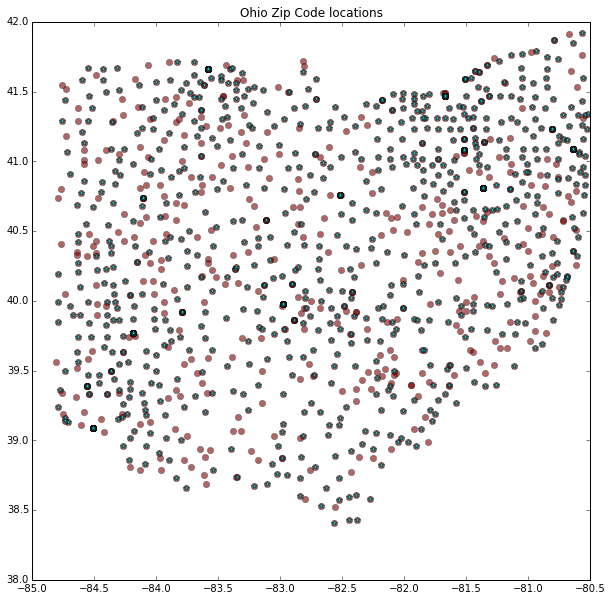

In [21]:
figure(figsize=(10,10))
plot(ohiozip['longitude'], ohiozip['latitude'], 'o', color="maroon",alpha=0.6)
title('Ohio Zip Code locations')
plot(myzips['longitude'], myzips['latitude'], '*',color="darkturquoise",alpha=0.8)

## clean up the driver data some
* remove drivers that are missing their zipcode value
* remove drivers with fewer than 1 day worth of odometer readings

In [23]:
print "there are {0} drivers that had mileage reported for less than 1 day.".format(len(driverDF[driverDF['DeltaDays']<1]))
print "{0} drivers had no zipcode given.".format(sum(driverDF.ZIP.isnull()))
driverDF = driverDF[~driverDF.ZIP.isnull()]

there are 0 drivers that had mileage reported for less than 1 day.
2 drivers had no zipcode given.


In [24]:
## Drop drivers where the change in days is smaller than 1.
driverDF = driverDF[driverDF.DeltaDays > 0]
ndrivers = len(driverDF)
print "There are now {0} drivers in our data set".format(ndrivers)
isMale = driverDF[driverDF.Gender=='M']
print "{0} or {1:.2f}% are male.".format(len(isMale),len(isMale)/float(ndrivers)*100)
hasClaim = driverDF[driverDF.ClaimFlag==1]
print "{0} or {1:.2f}% have experienced a claim.".format(len(hasClaim),len(hasClaim)/float(ndrivers)*100)

There are now 21484 drivers in our data set
13277 or 61.80% are male.
3506 or 16.32% have experienced a claim.


In [26]:
# convert ZIP to int
driverDF['ZIP'] = driverDF['ZIP'].apply(lambda x: int(x))

## append information from zipcode table:
1. primary city
2. county
3. estimated_population
4. county_population
    * this last one need to be calculated first

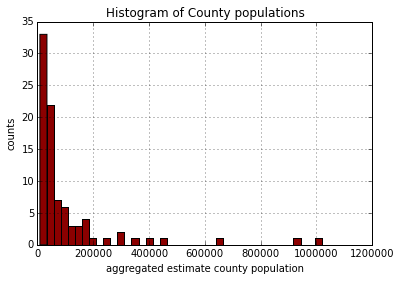

In [27]:
ohioCounty = ohiozip.groupby('county')
ohCountyPop = ohioCounty['estimated_population'].agg(np.sum)
ohCountyPop.hist(color='darkred',bins=40)
title('Histogram of County populations')
xlabel('aggregated estimate county population')
ylabel('counts')

In [28]:
# elminate data I don't want from the ohioZipcodes table
ohiozip.drop(['type','acceptable_cities','unacceptable_cities','state','timezone','world_region','country','decommissioned','notes'],axis=1,inplace=True)
print "There are {0} unique zipcodes in Ohio".format(len(ohiozip))


There are 1447 unique zipcodes in Ohio


In [29]:
ohiozip.rename(columns={'zip':'ZIP'},inplace=True)

In [30]:
#keep original driverID before it is lost by merging
driverDF['DRIVER_ID']= driverDF.index
driverDF.columns

Index([u'DRIVER_ID', u'amin', u'amax', u'Nmonths', u'Gender', u'Age', u'ZIP',
       u'OdoStart', u'OdoEnd', u'DeltaOdo', u'DeltaDays', u'AnnualMileage',
       u'ClaimTot', u'ClaimFlag'],
      dtype='object')

In [31]:
# merge ohiocounty population into ohiozip info
ohCountyPop= pd.DataFrame(ohCountyPop).rename(columns={'estimated_population':'county_pop'})
#ohCountyPop.index
ohioData = pd.merge(ohiozip,ohCountyPop,how='left',left_on='county',right_index=True)
print shape(ohioData)

(1447, 8)


In [32]:
ohioData.head()

,ZIP,primary_city,county,area_codes,latitude,longitude,estimated_population,county_pop
18447,43001,Alexandria,Licking County,"614,740",40.08,-82.61,2179,122544
18448,43002,Amlin,Franklin County,614,40.07,-83.18,0,939232
18449,43003,Ashley,Delaware County,740,40.40,-82.95,2354,148047
18450,43004,Blacklick,Franklin County,614,40.02,-82.80,19234,939232
18451,43005,Bladensburg,Knox County,740,40.27,-82.23,0,46447


In [33]:
# join based upon zip
mergedDF = pd.merge(driverDF,ohioData,on='ZIP',how='left')
print shape(mergedDF)

(21484, 21)


In [34]:
mergedDF.columns

Index([u'DRIVER_ID', u'amin', u'amax', u'Nmonths', u'Gender', u'Age', u'ZIP',
       u'OdoStart', u'OdoEnd', u'DeltaOdo', u'DeltaDays', u'AnnualMileage',
       u'ClaimTot', u'ClaimFlag', u'primary_city', u'county', u'area_codes',
       u'latitude', u'longitude', u'estimated_population', u'county_pop'],
      dtype='object')

## some summary plots

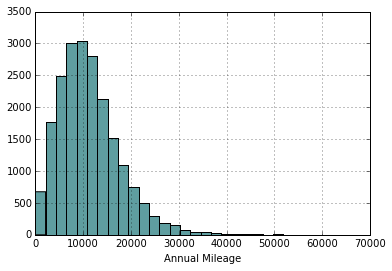

In [35]:
mergedDF.AnnualMileage.hist(bins=30,color='cadetblue')
xlabel('Annual Mileage')

## is there a difference between mileage traveled by claims or no claims?

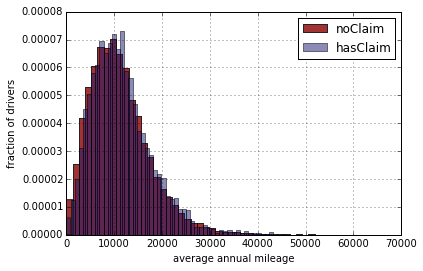

In [36]:
noClaimIDX = mergedDF[mergedDF['ClaimFlag']!=1].index
mergedDF['AnnualMileage'].ix[noClaimIDX].hist(bins=50,normed=True,color='darkred',alpha=0.8,label='noClaim')
mergedDF['AnnualMileage'].ix[hasClaim.index].hist(bins=50,normed=True,color='midnightblue',alpha=0.5,label='hasClaim')
#hist(avgAclm,bins=50,range=[0,50000],normed=True,color='indianred',alpha=0.5)
xlabel('average annual mileage')
ylabel('fraction of drivers')
legend()

### To do: perform a t-test on these distributions of mileage travelled
* actually perform a Manley-Whitely-Wilcoxon Rank sum test

In [ ]:
# how

In [44]:
from scipy import stats  


In [58]:
no_claim_miles = mergedDF['AnnualMileage'].ix[noClaimIDX]#.values
has_claim_miles = mergedDF['AnnualMileage'].ix[hasClaim.index]
# drop nans
no_claim_miles2 = no_claim_miles[~no_claim_miles.isnull()].values
has_claim_miles2= has_claim_miles[~has_claim_miles.isnull()].values

print "There are {0} observations with no claims and {1} observations with claims".format(len(no_claim_miles2),len(has_claim_miles2))


There are 17192 observations with no claims and 3427 observations with claims


In [ ]:
z_stat, p_val = stats.ranksums(no_claim_miles2, has_claim_miles2)  
  
print "MWW RankSum p for no_claim_miles and has_claim_miles =", p_val  


In [56]:
## now the ttest
# remove nans
tt_zscore, tt_p_val = stats.ttest_ind(no_claim_miles2,has_claim_miles2)
print "t-test for  no_claims_miles and Has_claim_miles = ", p_val


t-test for  no_claims_miles and Has_claim_miles =  1.78888431935e-05


##Is there a difference in the mileage traveled by gender?

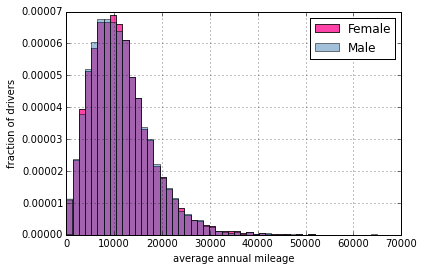

In [148]:
female = mergedDF[mergedDF['Gender']!=1]
mergedDF['AnnualMileage'].ix[female.index].hist(bins=50,normed=True,color='deeppink',alpha=0.8,label='Female')
mergedDF['AnnualMileage'].ix[isMale.index].hist(bins=50,normed=True,color='steelblue',alpha=0.5,label='Male')
#hist(avgAclm,bins=50,range=[0,50000],normed=True,color='indianred',alpha=0.5)
xlabel('average annual mileage')
ylabel('fraction of drivers')
legend()

In [153]:
mergedDF.ClaimFlag[mergedDF.Gender=='F'].value_counts(), mergedDF.ClaimFlag[mergedDF.Gender=='M'].value_counts()

(0    6186
 1    1318
 dtype: int64, 0    10685
 1     2106
 dtype: int64)

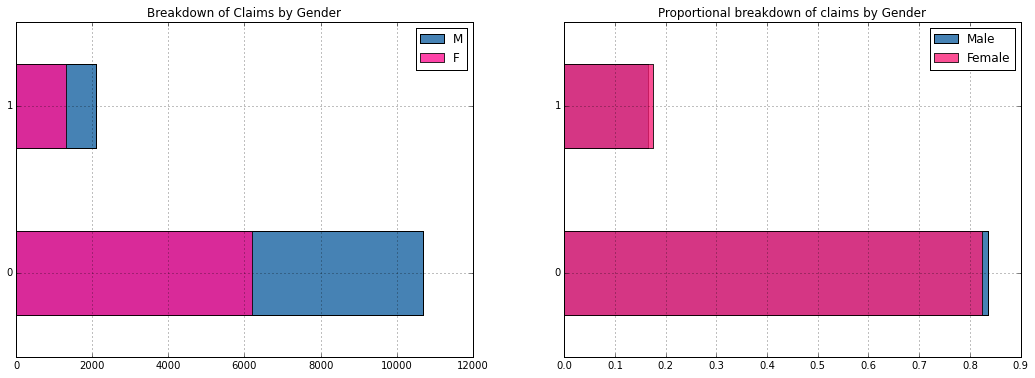

In [158]:
figure(figsize=(18,6))
subplot(121)
mergedDF.ClaimFlag[mergedDF.Gender=='M'].value_counts().plot(kind='barh',label='M',color='steelblue')
mergedDF.ClaimFlag[mergedDF.Gender=='F'].value_counts().plot(kind='barh',label='F',color='deeppink',alpha=0.8)
#set_yticklabels(['Claim','No Claim'])
legend(loc="best")
title('Breakdown of Claims by Gender')
subplot(122)
(mergedDF.ClaimFlag[mergedDF.Gender == 'M'].value_counts()/float(mergedDF.Gender[mergedDF.Gender == 'M'].size)).plot(kind='barh',label='Male',color='steelblue')  
(mergedDF.ClaimFlag[mergedDF.Gender == 'F'].value_counts()/float(mergedDF.Gender[mergedDF.Gender == 'F'].size)).plot(kind='barh', color='#FA2379',label='Female',alpha=0.8)
title("Proportional breakdown of claims by Gender"); legend(loc='best')

### Is there a correlation between claim amount and mileage driven?

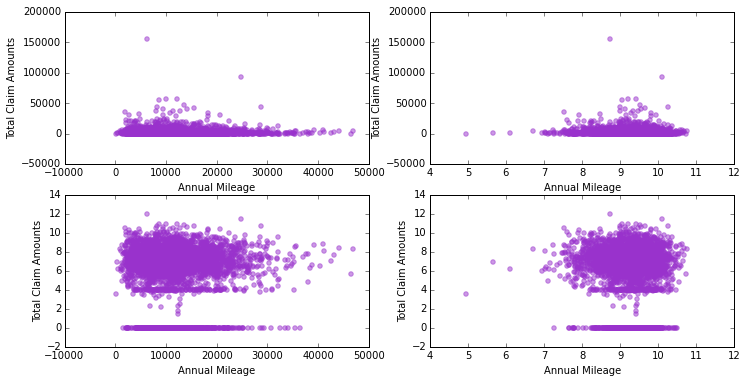

In [184]:
figure(figsize=(12,6))
subplot(221)
scatter(hasClaim.AnnualMileage.values,hasClaim.ClaimTot.values,color='darkorchid',alpha=0.5)
ylabel('Total Claim Amounts')
xlabel('Annual Mileage')
subplot(222)
scatter(log(hasClaim.AnnualMileage.values+1),hasClaim.ClaimTot.values,color='darkorchid',alpha=0.5)
ylabel('Total Claim Amounts')
xlabel('Annual Mileage')
subplot(223)
scatter(hasClaim.AnnualMileage.values,log(hasClaim.ClaimTot.values+1),color='darkorchid',alpha=0.5)
ylabel('Total Claim Amounts')
xlabel('Annual Mileage')
subplot(224)
scatter(log(hasClaim.AnnualMileage.values+1),log(hasClaim.ClaimTot.values+1),color='darkorchid',alpha=0.5)
ylabel('Total Claim Amounts')
xlabel('Annual Mileage')

In [166]:
mergedDF[mergedDF.Age<16][['ZIP','Gender','DRIVER_ID','Age']]

,ZIP,Gender,DRIVER_ID,Age
8844,43147,M,1613,-3
8950,43526,M,20343,0
9098,44109,M,9312,13


In [179]:
# there are few ages that are suspect . Replace with median value? ~59.

# Test the ability of mileage, age, zip code to predict a claim

In [186]:
mergedDF.head()

,amin,amax,Nmonths,Gender,Age,ZIP,OdoStart,OdoEnd,DeltaOdo,DeltaDays,...,ClaimTot,ClaimFlag,DRIVER_ID,primary_city,county,area_codes,latitude,longitude,estimated_population,county_pop
0,2010-02-24,2013-08-07,42,M,67,43725,27264,59200,31936,1260 days,...,8192.39,1,1,Cambridge,Guernsey County,740,40.02,-81.58,16033,29630
1,2010-01-08,2013-09-19,45,M,72,43725,25511,50573,25062,1350 days,...,NaN,0,761,Cambridge,Guernsey County,740,40.02,-81.58,16033,29630
2,2011-03-02,2013-08-09,28,M,52,43725,375,33352,32977,891 days,...,NaN,0,831,Cambridge,Guernsey County,740,40.02,-81.58,16033,29630
3,2009-09-10,2013-08-20,47,M,60,43725,37749,72034,34285,1440 days,...,NaN,0,1083,Cambridge,Guernsey County,740,40.02,-81.58,16033,29630
4,2012-03-05,2013-07-28,17,M,62,43725,50334,84019,33685,510 days,...,5992.98,1,2107,Cambridge,Guernsey County,740,40.02,-81.58,16033,29630


In [187]:
mergedDF.columns

Index([u'amin', u'amax', u'Nmonths', u'Gender', u'Age', u'ZIP', u'OdoStart', u'OdoEnd', u'DeltaOdo', u'DeltaDays', u'AnnualMileage', u'ClaimTot', u'ClaimFlag', u'DRIVER_ID', u'primary_city', u'county', u'area_codes', u'latitude', u'longitude', u'estimated_population', u'county_pop'], dtype='object')

In [59]:
# convert Gender to boolean 1 for M; 0 for F
mergedDF['Gender'].replace({'M':1,'F':0},inplace=True)

In [60]:
mergedDF.ClaimFlag.value_counts()

0    17978
1     3506
dtype: int64

In [61]:
#Survived are the target values
target = mergedDF.ClaimFlag.values


# numerical features as values
numericalCols = ['Age','estimated_population','county_pop','latitude','longitude','OdoStart','Nmonths']
#numericalCols = ['AnnualMileage']
numerical_features = mergedDF.get(numericalCols)
numerical_features.fillna(0.0,inplace=True)
numerical_features.head()


C:\Anaconda\lib\site-packages\pandas\core\frame.py:2532: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


,Age,estimated_population,county_pop,latitude,longitude,OdoStart,Nmonths
0,67,16033,29630,40.02,-81.58,27264,42
1,49,17671,1018627,41.31,-81.85,53627,41
2,41,49757,939232,39.87,-83.07,3098,5
3,64,38659,302333,40.78,-81.52,114,6
4,67,1833,50249,40.01,-81.07,11,28


In [62]:
features_array = numerical_features.values
print shape(features_array)
print features_array.dtype
from sklearn.cross_validation import train_test_split

features_train, features_test, target_train, target_test = train_test_split(
    features_array, target, test_size=0.20, random_state=33)

(21484L, 7L)
float64


In [249]:
features_array = numerical_features.values
features_train, features_test, target_train, target_test = train_test_split(
    features_array, target, test_size=0.20, random_state=0)

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [69]:
logregother = LogisticRegression(C=1)
logregother.fit(features_train, target_train)
target_predicted_other = logregother.predict(features_test)
scoreother = accuracy_score(target_test, target_predicted_other)

print "Using these {0} features, our prediction using Log Regression is {1:.5f}".format(trainShape[1],scoreother)

Using these 7 features, our prediction using Log Regression is 0.83221


In [70]:
target_predicted_probaOO = logregother.predict_proba(features_test)

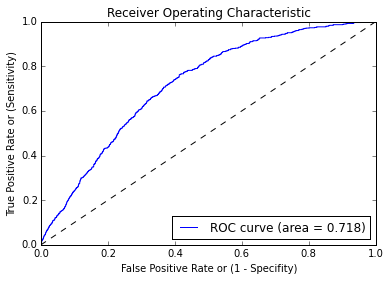

In [74]:
plot_roc_curve(target_test, target_predicted_probaOO)

In [78]:
from sklearn.metrics import confusion_matrix

[[3570    4]
 [ 717    6]]


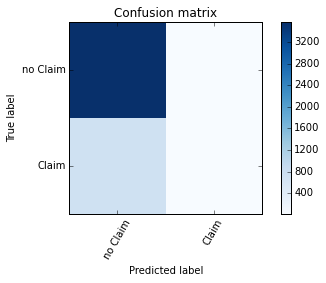

In [79]:
cmOO = confusion_matrix(target_test, target_predicted_other)
print(cmOO)
plot_confusion(cmOO)

# do a simple logistic regression on these features.

In [68]:
trainShape = features_train.shape
testShape = features_test.shape

print "Training set has {0} elements and {1} features".format(trainShape[0],trainShape[1])
print "Testing set has {0} elements and {1} features".format(testShape[0],testShape[1])
print target_train.shape

Training set has 17187 elements and 7 features
Testing set has 4297 elements and 7 features
(17187L,)


In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


logreg = LogisticRegression(C=1)
logreg.fit(features_train, target_train)
target_predicted = logreg.predict(features_test)
score1 = accuracy_score(target_test, target_predicted)

print "Using these {0} features, our prediction using Log Regression is {1:.5f}".format(trainShape[1],logreg.score(features_test, target_test))

Using these 7 features, our prediction using Log Regression is 0.83221


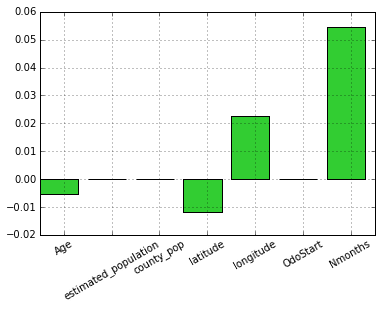

In [81]:
logreg.coef_
feature_names = numerical_features.columns
x = np.arange(len(feature_names))
bar(x, logreg.coef_.ravel(),color='limegreen')
_ = xticks(x + 0.5, feature_names, rotation=30)
grid(True)

In [82]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(target_test, target_predicted)
print(cm)

[[3570    4]
 [ 717    6]]


In [83]:
sum(target_test), sum(target)

(723, 3506)

In [84]:
def plot_confusion(cm):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.binary)
    plt.title('Confusion matrix')
    plt.set_cmap('Blues')
    plt.colorbar()

    target_names = ['no Claim', 'Claim']

    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=60)
    plt.yticks(tick_marks, target_names)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    # Convenience function to adjust plot parameters for a clear layout.
    plt.tight_layout()
    
#plot_confusion(cm)

In [85]:
len(target_test), sum(target_test), 

(4297, 723)

In [86]:
#target_predicted_proba = logreg.predict_proba(features_test)
#target_predicted_proba_Norm = logregN.predict_proba(features_test)
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

def plot_roc_curve(target_test, target_predicted_proba):
    fpr, tpr, thresholds = roc_curve(target_test, target_predicted_proba[:, 1])
    
    roc_auc = auc(fpr, tpr)
    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")


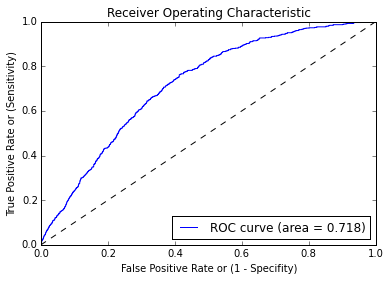

In [88]:
plot_roc_curve(target_test, logreg.predict_proba(features_test))

In [89]:
%%time

from sklearn.cross_validation import cross_val_score

logregV = LogisticRegression(C=1)
scores = cross_val_score(logregV, features_array , target, cv=5, scoring='accuracy')
print("Logistic Regression CV scores:")
print("min: {:.3f}, mean: {:.3f}, max: {:.3f}".format(
    scores.min(), scores.mean(), scores.max()))

Logistic Regression CV scores:
min: 0.836, mean: 0.837, max: 0.837
Wall time: 751 ms


In [90]:
mergedDF.ClaimFlag.value_counts()/float(len(mergedDF))

0    0.836809
1    0.163191
dtype: float64

In [91]:
# look at fraction of young drivers

In [92]:
nyoung = sum(mergedDF['Age']<25)
print "{0} drivers are less than 26 years old".format(nyoung)
mergedDF[mergedDF.Age < 25].ClaimFlag.value_counts()/float(nyoung)

466 drivers are less than 26 years old


0    0.856223
1    0.143777
dtype: float64

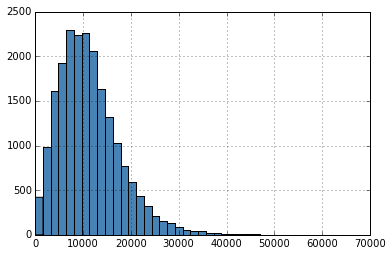

In [93]:
mergedDF.AnnualMileage.hist(bins=40,color='steelblue')

In [ ]:
# interact with this distribution
from IPython.html.widgets import interact
def plot_claims(index):
    fig,ax = plt.subplots()
    x, y = train_data[:,index], train_target
    ax.scatter(x, y)
    ax.set_xlabel(boston.feature_names[index])
    ax.set_ylabel("House price")
    print("Correlation: {0[0]:.1} (p-value: {0[1]:.1})".format(stats.pearsonr(x, y)))
    return fig

In [280]:
nLargeMiles = sum(mergedDF.AnnualMileage>=20000)

print "{0} drivers travel more than 20000 miles annually".format(nLargeMiles)
mergedDF[mergedDF.AnnualMileage>=20000].ClaimFlag.value_counts()/float(nLargeMiles)

1936
1936 drivers travel more than 20000 miles annually


0    0.794938
1    0.205062
dtype: float64

In [283]:
nMale = sum(mergedDF.Gender==1)
print "{0} drivers are male".format(nMale)
print mergedDF[mergedDF.Gender==1].ClaimFlag.value_counts()/float(nMale)
nF = sum(mergedDF.Gender==0)
print "{0} drivers are female".format(nF)
print mergedDF[mergedDF.Gender==0].ClaimFlag.value_counts()/float(nF)


12791 drivers are male
0    0.835353
1    0.164647
dtype: float64
7504 drivers are female
0    0.82436
1    0.17564
dtype: float64


In [217]:
shape(features_train[:,0]),shape(features_test[:,0]), shape(target_train)

((16549L,), (4138L,), (16549L,))

In [222]:
mileage_train = features_train[:,0]
mileage_test = features_test[:,0]
# look at logReg prediction using just AnnualMileage
logregMiles = LogisticRegression(C=1)
logregMiles.fit(mileage_train, target_train)
#target_predictedMiles = logreg.predict(mileage_test)
#score1 = accuracy_score(target_test, target_predictedMiles)
#print "with just mileage our Logistic regression yielded a score of {0:.5f}".format(score1)

ValueError: X and y have incompatible shapes.
X has 1 samples, but y has 16549.

In [265]:
numericalCols = ['Age','estimated_population','county_pop','AnnualMileage','latitude','longitude','OdoStart','Nmonths']
numerical_features = mergedDF.get(numericalCols)
numerical_features.fillna(0.0,inplace=True)
numerical_features.head()

,Age,estimated_population,county_pop,AnnualMileage,latitude,longitude,OdoStart,Nmonths
0,67,16033,29630,9257.638095,40.02,-81.58,27264,42
1,72,16033,29630,6780.663333,40.02,-81.58,25511,45
2,52,16033,29630,13518.349327,40.02,-81.58,375,28
3,60,16033,29630,8696.247396,40.02,-81.58,37749,47
4,62,16033,29630,24124.404412,40.02,-81.58,50334,17


In [266]:
## also I should look at normed values
maxValues = numerical_features[numericalCols].max()
maxValues

Age                         113.000000
estimated_population      55006.000000
county_pop              1018627.000000
AnnualMileage             64873.651961
latitude                     41.920000
longitude                   -80.520000
OdoStart                 327711.000000
Nmonths                      50.000000
dtype: float64

## USING STASTMODELS

In this case we need to create the target variable, i.e. y and the design matrix, i.e. x.
Using R-type notation we can specify the formula relating these two.
For example if we want to see ClaimsTotal as a function of the other columns (Linear Regresion) write: 

`f = 'ClaimTot ~ AnnualMileage+county_pop+Age+OdoStart+estimated_pop+
`f = 'Fertility ~ Agriculture+Examination+Education+Catholic+InfMortality'`

In [185]:
import statsmodels.api as sm
from patsy import dmatrices

In [ ]:
f = 'Fertility ~ Agriculture + Examination + Education + Catholic+InfMortality'
y,x = dmatrices(f,swiss,return_type='dataframe')

In [268]:
f = 'ClaimTot ~ AnnualMileage+county_pop+Age+OdoStart+estimated_population'
y,x = dmatrices(f,mergedDF,return_type='dataframe')

In [269]:
ols1 = sm.OLS(y, x)
# Fit the model
ols1_res = ols1.fit()
# print the results
ols1_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ClaimTot   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.238
Date:                Tue, 04 Nov 2014   Prob (F-statistic):              0.289
Time:                        10:18:11   Log-Likelihood:                -34938.
No. Observations:                3495   AIC:                         6.989e+04
Df Residuals:                    3489   BIC:                         6.992e+04
Df Model:                           5                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept             2441.3649    487.573      5.007      0.000      1485.408  3397.322
AnnualMileage           -0.0082      0.015     -0.547      0.584        -0.038     0.021
county_pop               0.0001      0.000      0.354      0.724        -0.000     0.001
Age                      5.4807      5.780      0.948      0.343        -5.852    16.813
OdoStart                -0.0068      0.004     -1.772      0.077        -0.014     0.001
estimated_population    -0.0080      0.007     -1.119      0.263        -0.022     0.006
==============================================================================
Omnibus:                     5939.990   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8542144.424
Skew:                          11.306   Prob(JB):                         0.00
Kurtosis:                     244.137   Cond. No.                     2.60e+06
==============================================================================

Warnings:
[1] The condition number is large, 2.6e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [237]:
mergedDF['intercept']=1
logit0 = sm.Logit(mergedDF['ClaimFlag'],mergedDF['intercept'])

In [238]:
# null result:
result0 = logit0.fit()
result0.summary()

Optimization terminated successfully.
         Current function value: 0.454212
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              ClaimFlag   No. Observations:                20687
Model:                          Logit   Df Residuals:                    20686
Method:                           MLE   Df Model:                            0
Date:                Fri, 31 Oct 2014   Pseudo R-squ.:                   0.000
Time:                        16:10:05   Log-Likelihood:                -9396.3
converged:                       True   LL-Null:                       -9396.3
                                        LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
intercept     -1.5931      0.019    -85.859      0.000        -1.629    -1.557
==============================================================================
"""

In [239]:
mileagedata = mergedDF[['AnnualMileage','intercept']]
#
logitMileage = sm.Logit(target,mileagedata)
resultMilage = logitMileage.fit()
resultMilage.summary()

Optimization terminated successfully.
         Current function value: 0.452053
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                20687
Model:                          Logit   Df Residuals:                    20685
Method:                           MLE   Df Model:                            1
Date:                Fri, 31 Oct 2014   Pseudo R-squ.:                0.004754
Time:                        16:12:22   Log-Likelihood:                -9351.6
converged:                       True   LL-Null:                       -9396.3
                                        LLR p-value:                 3.322e-21
=================================================================================
                    coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
AnnualMileage  2.592e-05    2.7e-06      9.605      0.000      2.06e-05  3.12e-05
intercept        -1.8954      0.037    -50.674      0.000        -1.969    -1.822
=================================================================================
"""

In [241]:
numericalCols = ['AnnualMileage','Age','estimated_population','county_pop','latitude','longitude','OdoStart','Nmonths','intercept']
data = mergedDF[numericalCols]
logit = sm.Logit(target,data)
result1 = logit.fit()
result1.summary()

Optimization terminated successfully.
         Current function value: 0.413826
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                20687
Model:                          Logit   Df Residuals:                    20678
Method:                           MLE   Df Model:                            8
Date:                Fri, 31 Oct 2014   Pseudo R-squ.:                 0.08891
Time:                        16:14:33   Log-Likelihood:                -8560.8
converged:                       True   LL-Null:                       -9396.3
                                        LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
AnnualMileage         4.759e-05   3.07e-06     15.493      0.000      4.16e-05  5.36e-05
Age                      0.0022      0.001      1.749      0.080        -0.000     0.005
estimated_population -5.266e-07   1.52e-06     -0.346      0.730     -3.51e-06  2.46e-06
county_pop           -8.667e-08    6.1e-08     -1.422      0.155     -2.06e-07  3.28e-08
latitude                -0.0775      0.030     -2.573      0.010        -0.137    -0.018
longitude                0.0408      0.021      1.983      0.047         0.000     0.081
OdoStart               -2.1e-07   8.44e-07     -0.249      0.803     -1.86e-06  1.44e-06
Nmonths                  0.0563      0.001     38.329      0.000         0.053     0.059
intercept                3.1282      2.667      1.173      0.241        -2.098     8.355
========================================================================================
"""

In [246]:
corrcoef(data.estimated_population,data.county_pop)

array([[ 1.        ,  0.23644172],
       [ 0.23644172,  1.        ]])

# create a new data frame 
rows are timestamps in the range of min(MOD_DATE) to max(MOD_DATE)
columns are for each driver


In [42]:
listOfMODDATES = fulldata.MOD_DATE.unique()
len(listOfMODDATES)

50

In [44]:
listOfMODDATES = sort(listOfMODDATES)
timeIndex2 = listOfMODDATES

In [51]:
col1 = np.linspace(0,50,50)
col1

array([  0.        ,   1.02040816,   2.04081633,   3.06122449,
         4.08163265,   5.10204082,   6.12244898,   7.14285714,
         8.16326531,   9.18367347,  10.20408163,  11.2244898 ,
        12.24489796,  13.26530612,  14.28571429,  15.30612245,
        16.32653061,  17.34693878,  18.36734694,  19.3877551 ,
        20.40816327,  21.42857143,  22.44897959,  23.46938776,
        24.48979592,  25.51020408,  26.53061224,  27.55102041,
        28.57142857,  29.59183673,  30.6122449 ,  31.63265306,
        32.65306122,  33.67346939,  34.69387755,  35.71428571,
        36.73469388,  37.75510204,  38.7755102 ,  39.79591837,
        40.81632653,  41.83673469,  42.85714286,  43.87755102,
        44.89795918,  45.91836735,  46.93877551,  47.95918367,
        48.97959184,  50.        ])

In [54]:
newDF = pd.DataFrame(index=timeIndex2,data=col1,columns=['dummy'])
len(newDF)

50

In [213]:
print len(byDriver.get_group(188))
byDriver.get_group(188)[['MOD_DATE','Odometer at time captured','Odometer captured data']]

12


,MOD_DATE,Odometer at time captured,Odometer captured data
3556,2011-05-01,30,2011-05-09
3557,2011-05-01,524,2011-05-20
3558,2011-06-01,1205,2011-06-09
3559,2011-07-01,2000,2011-07-12
3560,2011-08-01,3072,2011-08-07
3561,2011-09-01,4104,2011-09-07
3562,2011-10-01,4996,2011-10-06
3563,2011-11-01,5878,2011-11-02
3564,2011-11-01,5958,2011-11-05
3565,2013-06-01,23304,2013-06-27


In [65]:
df = byDriver.get_group(188)
A = df[['MOD_DATE','Odometer at time captured','Odometer captured data']]
A.drop_duplicates('MOD_DATE',take_last=True,inplace=True)

In [82]:
def returnDriverDF(grpDF,gp):
    tdf = grpDF.get_group(gp)
    A = tdf[['MOD_DATE','Odometer at time captured']]
    A.drop_duplicates('MOD_DATE',take_last=True,inplace=True)
    index = pd.Index(A.MOD_DATE)
    cname = 'drvr'+str(gp)
    B = pd.DataFrame(index=index,data=A['Odometer at time captured'].values,columns=[cname])
    return B
    
    

In [ ]:
cc = returnDriverDF(byDriver,138)
cc

In [ ]:
#now loop over the groups
for gp in byDriver.groups.keys():
    myDF = returnDriverDF(byDriver,gp)
    newDF = pd.concat([newDF,myDF],axis=1)

#newDF.drop('dummy',axis=1,inplace=True) #get rid of the initial dummy row
print "This study had {0} drivers over {1} Months.".format(len(byDriver.groups.keys()),len(newDF))

In [96]:
newDF.drop('dummy',axis=1,inplace=True)

In [ ]:
outTSfile = 'driverMileagle.csv'
newDF.to_csv(outTSfile)

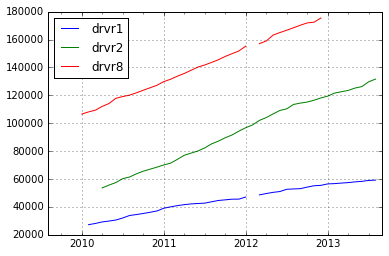

In [103]:
newDF[['drvr1','drvr2','drvr8']].plot()

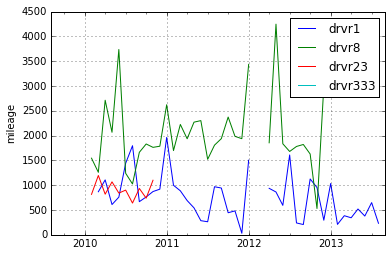

In [109]:
newDF.diff()[['drvr1','drvr8','drvr23','drvr333']].plot()
ylabel('mileage')

In [ ]:
byDriver.ZIP5.unique()

In [ ]:
fulldata.ZIP5.value_counts()

In [ ]:
for g,df in byDriver:
    if 45840.0 in df.ZIP5.unique():
        print g, len(df)

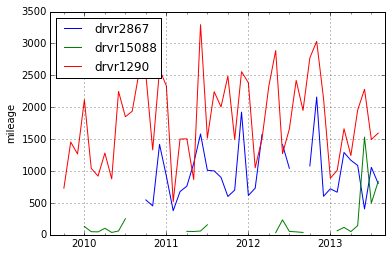

In [123]:
newDF.diff()[['drvr2867','drvr15088','drvr1290']].plot()
ylabel('mileage')
legend(loc=2)

In [131]:
tdf[tdf['MOD_DATE']=='2013-01-01']
tdf.ix[281073].values

array([14148, 15088, Timestamp('2013-01-01 00:00:00'), 1241339649.0,
       2942188.0, 2, nan, u'KR0AKSFNEB8', u'1G4HP52K75U192829', 18725,
       Timestamp('2013-01-02 00:00:00'), u'.', u'.', u'.', nan, u'.', u'.',
       u'.', u'.', u'.', u'.', u'.', nan, nan, nan, nan, u'.', u'.', u'.',
       u'.', u'.', u'.', nan, nan, nan, nan, u'M',
       Timestamp('1940-09-29 00:00:00'), 72, 2005.0, u'BUICK', u'LESABRE',
       45840.0, 0, nan, nan], dtype=object)

In [133]:
fulldata.columns

Index([u'HH_ID', u'DRIVER_ID', u'MOD_DATE', u'Market_Unit_ID', u'POLICY_NUMBER', u'UNIQUE_DIGIT', u'CAR_NUMBER', u'FRED_ID', u'VIN', u'Odometer at time captured', u'Odometer captured data', u'Lower Net Worth Range', u'Upper Net Worth Range', u'Home ownership (1=yes)', u'Household Size', u'Young adult present', u'Senior Adult Present', u'Child Present', u'Lower Income Range (source 1)', u'Upper Income Range (source 1)', u'Lower Income Range (source 2)', u'Upper Income Range (source 2)', u'Martial Status', u'Length at Residence', u'Home Property Type', u'Home Property Type (Detailed)', u'Home Loan Amount', u'Home Equity Available', u'Home Equity Available (Lower)', u'Home Equity Available (Upper)', u'Home Value (Lower)', u'Home Value (Upper)', u'Occupation of person 1', u'Education of person 1', u'Occupation of person 2', u'Education of person 2', u'Gender of applicant', u'Applicant Birthdate', u'Applicant Age', u'CARYEAR', u'MAKE', u'MODEL', u'ZIP5', u'Claim Flag (1=Claim)', u'Cause of 

In [151]:
# create a pivot table for the values
pvt = pd.pivot_table(fulldata,values='Odometer at time captured',index='MOD_DATE',columns='DRIVER_ID')
shape(pvt)

(50, 21486)

In [ ]:
for i in pvt.columns:
    print 'driver # {0} has {1} months of data'.format(i,sum(pvt[i].notnull()))

## Interlude into the dates and odometers

In [25]:
def plotOdo(byDriver,grp):
    mdIndex = byDriver.get_group(grp)['MOD_DATE'].values
    nmonths = len(byDriver.get_group(grp)['MOD_DATE'].unique())
    rdIndex = byDriver.get_group(grp)['OdoDate'].values
    odovals = byDriver.get_group(grp)['Odometer'].values
    print "{0} time points reported; corresponding to {1} unique months.".format(len(mdIndex),nmonths)
#print mdIndex
#print rdIndex
    mddf = pd.DataFrame(index=mdIndex,data=odovals,columns=['Odo'])
    rddf = pd.DataFrame(index=rdIndex,data=odovals,columns=['Odo'])
    figure(figsize=(12,8))
    mddf.plot(color='firebrick',marker='^',label='Mod')
    #plot(mddf.index,mddf.Odo,color='firebrick',marker='^',label='Mod')
    plot(rddf.index,rddf.Odo,color='cadetblue',marker='s',label='Act')
    rmin = rddf.index.min()
    rmax = rddf.index.max()
    print "First date is {0}, last date is {1}.".format(rmin.strftime(format='%m-%d-%Y'),rmax.strftime(format='%m-%d-%Y'))
    legend(loc=2)
    #grid=True
    return

34 time points reported; corresponding to 28 unique months.
First date is 03-02-2011, last date is 08-19-2013.


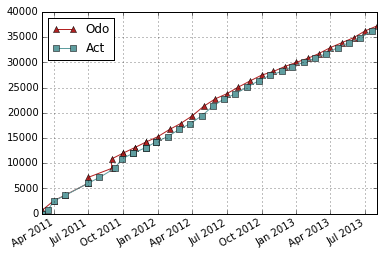

In [26]:
plotOdo(byDriver,5)


(array([ 1562.,  1986.,  1315.,  1993.,  1356.,   614.,  1418.,  1137.,
          398.,   810.,   389.,   802.,   831.,   421.,   828.,   921.,
          446.,   601.,   449.,   179.,   369.,   186.,   376.,   364.,
          202.,   434.,   505.,   216.,   292.,    86.]),
 array([  1.        ,   2.63333333,   4.26666667,   5.9       ,
          7.53333333,   9.16666667,  10.8       ,  12.43333333,
         14.06666667,  15.7       ,  17.33333333,  18.96666667,
         20.6       ,  22.23333333,  23.86666667,  25.5       ,
         27.13333333,  28.76666667,  30.4       ,  32.03333333,
         33.66666667,  35.3       ,  36.93333333,  38.56666667,
         40.2       ,  41.83333333,  43.46666667,  45.1       ,
         46.73333333,  48.36666667,  50.        ]),
 <a list of 30 Patch objects>)

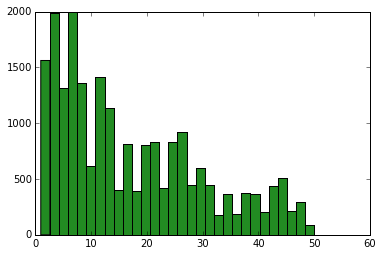

In [304]:
hist(monthCounts,bins=30,color='forestgreen')


In [307]:
# about half the drivers have > 1 year of data
print "Out of {0} drivers, {1} have more than 11 months of values.".format(len(monthCounts),sum(monthCounts >11))

Out of 21486 drivers, 11925 have more than 11 months of values.


In [379]:
# I want a function that returns the 'top' value for a given column
def topK(df,column_name,K=5):
    vc = df[column_name].value_counts()
    try:
        ret_list = vc.index[:K-1]
    except:
        ret_list = [np.nan()]
    return ret_list
    
#df.HH_ID.value_counts()

def maptoFoundvalue(df,column_name,value=1):
    # value is the value to check for and replace all by
    ret_val = None
    if value in df[column_name].unique():
        ret_val = value
        
    return ret_val

In [482]:
columnList

Index([u'HH_ID', u'DRIVER_ID', u'MOD_DATE', u'Market_Unit_ID', u'POLICY_NUMBER', u'UNIQUE_DIGIT', u'CAR_NUMBER', u'FRED_ID', u'VIN', u'Odometer at time captured', u'Odometer captured data', u'Lower Net Worth Range', u'Upper Net Worth Range', u'Home ownership (1=yes)', u'Household Size', u'Young adult present', u'Senior Adult Present', u'Child Present', u'Lower Income Range (source 1)', u'Upper Income Range (source 1)', u'Lower Income Range (source 2)', u'Upper Income Range (source 2)', u'Martial Status', u'Length at Residence', u'Home Property Type', u'Home Property Type (Detailed)', u'Home Loan Amount', u'Home Equity Available', u'Home Equity Available (Lower)', u'Home Equity Available (Upper)', u'Home Value (Lower)', u'Home Value (Upper)', u'Occupation of person 1', u'Education of person 1', u'Occupation of person 2', u'Education of person 2', u'Gender of applicant', u'Applicant Birthdate', u'Applicant Age', u'CARYEAR', u'MAKE', u'MODEL', u'ZIP5', u'Claim Flag (1=Claim)', u'Cause of 

# now look for claims for each driver

In [529]:
driverDemo.head()

,amin,amax,Nmonths,Gender,Age,ZIP,OdoStart,OdoEnd,DeltaOdo,DeltaMth,AvgAnnual,ClaimTot
DRIVER_ID,,,,,,,,,,,,
1,2010-02-01,2013-08-01,42,M,67,43725,27264,59200,31936,1277 days,9134.396241,8192.39
2,2010-04-01,2013-08-01,41,F,49,44149,53627,131606,77979,1218 days,23384.096675,NaN
3,2011-02-01,2011-06-01,5,M,41,43123,3098,11122,8024,120 days,24423.050000,665.62
4,2013-03-01,2013-08-01,6,M,64,44646,114,8400,8286,153 days,19780.794118,NaN
5,2011-03-01,2013-08-01,28,M,67,43719,11,37222,37211,884 days,15374.793835,106.00


In [ ]:
driverDemo.get(['AvgAnnual','ClaimTot'])


In [ ]:
for g,df in byDriver:
    if df['Claim Flag (1=Claim)']

In [44]:
byDriver.get_group(6)['ClaimFlag'].max()

1

In [593]:
driverDemo.head()

,amin,amax,Nmonths,Gender,Age,ZIP,OdoStart,OdoEnd,DeltaOdo,DeltaMth,AvgAnnual,ClaimTot,ClaimFlag
DRIVER_ID,,,,,,,,,,,,,
1,2010-02-01,2013-08-01,42,M,67,43725,27264,59200,31936,1277 days,9134.396241,8192.39,1
2,2010-04-01,2013-08-01,41,F,49,44149,53627,131606,77979,1218 days,23384.096675,NaN,NaN
3,2011-02-01,2011-06-01,5,M,41,43123,3098,11122,8024,120 days,24423.050000,665.62,1
4,2013-03-01,2013-08-01,6,M,64,44646,114,8400,8286,153 days,19780.794118,NaN,NaN
5,2011-03-01,2013-08-01,28,M,67,43719,11,37222,37211,884 days,15374.793835,106.00,1


## Load a file of zipcodes mapped to cities


In [652]:
driverDemo = driverDemo[driverDemo.ZIP.notnull()]
nDrivers = len(driverDemo)
print nDrivers

21484


In [655]:
len(driverDemo[driverDemo['DeltaMth'] < 1])

865

20619


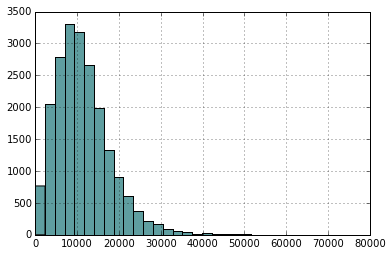

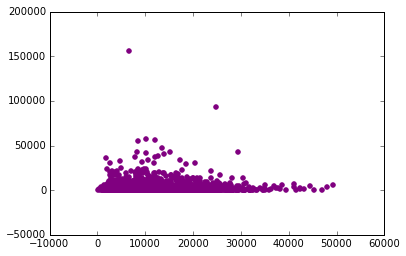

## copy the correct estimated population into the driverDemo data frame

In [636]:
len(ohiozip.primary_city.value_counts()), len(ohiozip.county.value_counts())

(1069, 88)

In [351]:
if 1 in byDriver.get_group(3)['Home ownership (1=yes)'].unique():
    print 'found 1'
else: 
    print 'absent'

absent


In [388]:
maptoFoundvalue(byDriver.get_group(38),'Martial Status','MARRIED')

In [391]:
byDriver.get_group(21)['Martial Status'].value_counts()

INFERRED MARRIED    4
SINGLE              2
dtype: int64

In [380]:
fulldata['Martial Status'].unique()

array([nan, u'MARRIED', u'SINGLE', u'INFERRED MARRIED', u'INFERRED SINGLE'], dtype=object)

In [392]:
topK(byDriver.get_group(3),'ZIP5',3)

Float64Index([43123.0, 45458.0], dtype='float64')

In [393]:
byDriver.get_group(3).ZIP5.value_counts()

43123    7
45458    2
43223    1
43228    1
dtype: int64

In [373]:
maptoFoundvalue(byDriver.get_group(21338), 'Home ownership (1=yes)')


0

In [354]:
fulldata['Senior Adult Present'].value_counts().index[0]

0

In [336]:
fulldata['Home ownership (1=yes)'].value_counts()

1    213176
.    107978
0     80294
dtype: int64

In [308]:
columnList

Index([u'HH_ID', u'DRIVER_ID', u'MOD_DATE', u'Market_Unit_ID', u'POLICY_NUMBER', u'UNIQUE_DIGIT', u'CAR_NUMBER', u'FRED_ID', u'VIN', u'Odometer at time captured', u'Odometer captured data', u'Lower Net Worth Range', u'Upper Net Worth Range', u'Home ownership (1=yes)', u'Household Size', u'Young adult present', u'Senior Adult Present', u'Child Present', u'Lower Income Range (source 1)', u'Upper Income Range (source 1)', u'Lower Income Range (source 2)', u'Upper Income Range (source 2)', u'Martial Status', u'Length at Residence', u'Home Property Type', u'Home Property Type (Detailed)', u'Home Loan Amount', u'Home Equity Available', u'Home Equity Available (Lower)', u'Home Equity Available (Upper)', u'Home Value (Lower)', u'Home Value (Upper)', u'Occupation of person 1', u'Education of person 1', u'Occupation of person 2', u'Education of person 2', u'Gender of applicant', u'Applicant Birthdate', u'Applicant Age', u'CARYEAR', u'MAKE', u'MODEL', u'ZIP5', u'Claim Flag (1=Claim)', u'Cause of 

In [323]:
pvt.resample('A', how=len)

DRIVER_ID,1,2,3,4,5,6,7,8,9,10,...,21477,21478,21479,21480,21481,21482,21483,21484,21485,21486
MOD_DATE,,,,,,,,,,,,,,,,,,,,,
2009-12-31,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
2010-12-31,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
2011-12-31,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
2012-12-31,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
2013-12-31,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


In [ ]:
byDriver.agg(lambda x: x.value_counts().index[0])
#source.groupby(['Country','City']).agg(lambda x:x.value_counts().index[0])

In [37]:
timeIndex = pd.date_range(firstdate,lastdate,freq='M',name='Monthly')

# begin by running with the pvt data 
###note that these values for cases with multiple MOD_DATE are averages.

In [325]:
pvt.diff().head()

DRIVER_ID,1,2,3,4,5,6,7,8,9,10,...,21477,21478,21479,21480,21481,21482,21483,21484,21485,21486
MOD_DATE,,,,,,,,,,,,,,,,,,,,,
2009-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-09-01,NaN,NaN,NaN,NaN,NaN,1077,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-10-01,NaN,NaN,NaN,NaN,NaN,1133,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-11-01,NaN,NaN,NaN,NaN,NaN,821,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1001,NaN,NaN
2009-12-01,NaN,NaN,NaN,NaN,NaN,965,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,336,NaN,NaN


In [ ]:
# take the 10 most complete examples
pvt.
zipcode_incident_table = orig_data.groupby(['Incident Zip', 'Complaint Type'])['Descriptor'].aggregate(len).unstack()